In [1]:
import requests
import pandas as pd

In [2]:
doc_id = "1C1Z752q4_TtjMlx1JrMw879y5Y-NWnBkpPfzQNbpvvw"
url = f"https://docs.google.com/spreadsheets/d/{doc_id}/gviz/tq?tqx=out:csv"
res = requests.get(url,allow_redirects=True)
open('./temp.csv', 'wb').write(res.content)
df = pd.read_csv('./temp.csv') 
df.head()

,Timestamp,Name?,Enter Measurement,Enter Measurement.1,Enter Measurement.2,Enter Measurement.3,Enter Measurement.4,Enter Measurement.5,Enter Measurement.6,Enter Measurement.7,...,Enter Measurement.10,Enter Measurement.11,Enter Measurement.12,Enter Measurement.13,Enter Measurement.14,Enter Measurement.15,Enter Measurement.16,Enter Measurement.17,Enter Measurement.18,Enter Measurement.19
0,4/28/2020 12:27:11,80_case1_normal,-22.9030,-22.9130,-22.928,-22.9390,-22.9470,-22.9590,-22.9740,-22.9830,...,-23.1980,-23.0170,-23.8710,-23.910,-22.927,-22.8870,-22.8670,-22.870,-22.8670,-22.8960
1,4/28/2020 12:41:04,80_case2_normal,2.8769,2.8759,2.875,2.8742,2.8731,2.8723,2.8715,2.8699,...,2.7862,2.7945,2.8051,2.802,2.798,2.7997,2.8015,2.801,2.8006,2.8778


In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()
gauth.LocalWebserverAuth() # client_secrets.json need to be in the same directory as the script
drive = GoogleDrive(gauth)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=378035454897-fb6tet75snufs9hkhujcanor90blfgsi.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [35]:
import apiclient
import oauth2client
from apiclient import http

file1 = drive.CreateFile({"mimeType": "text/csv"})
file1.SetContentFile("temp.csv")
file1.Upload()

In [44]:
#df = df.transpose()
from scipy.io import loadmat

annots = loadmat('80_case1_fault.mat')

In [45]:
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Ia_01_angle', 'Ia_01_freq', 'Ia_01_mag', 'Ia_02_angle', 'Ia_02_freq', 'Ia_02_mag', 'Ia_03_angle', 'Ia_03_freq', 'Ia_03_mag', 'Ia_04_angle', 'Ia_04_freq', 'Ia_04_mag', 'Ia_701_angle', 'Ia_701_freq', 'Ia_701_mag', 'Ia_709_angle', 'Ia_709_freq', 'Ia_709_mag', 'Iabc_01_THD', 'Iabc_01p_angle', 'Iabc_01p_freq', 'Iabc_01p_mag', 'Iabc_02_THD', 'Iabc_02p_angle', 'Iabc_02p_freq', 'Iabc_02p_mag', 'Iabc_03_THD', 'Iabc_03p_angle', 'Iabc_03p_freq', 'Iabc_03p_mag', 'Iabc_04_THD', 'Iabc_04p_angle', 'Iabc_04p_freq', 'Iabc_04p_mag', 'Iabc_701_THD', 'Iabc_701p_angle', 'Iabc_701p_freq', 'Iabc_701p_mag', 'Iabc_709_THD', 'Iabc_709p_angle', 'Iabc_709p_freq', 'Iabc_709p_mag', 'Ib_01_angle', 'Ib_01_freq', 'Ib_01_mag', 'Ib_02_angle', 'Ib_02_freq', 'Ib_02_mag', 'Ib_03_angle', 'Ib_03_freq', 'Ib_03_mag', 'Ib_04_angle', 'Ib_04_freq', 'Ib_04_mag', 'Ib_701_angle', 'Ib_701_freq', 'Ib_701_mag', 'Ib_709_angle', 'Ib_709_freq', 'Ib_709_mag', 'Ic_01_angle', 'Ic_01_fre

In [63]:
converted_value = getattr(annots['Ia_01_freq'], "tolist", lambda: value)()
converted_value1 = getattr(annots['Ia_02_freq'], "tolist", lambda: value)()
converted_value2 = getattr(annots['Ia_03_freq'], "tolist", lambda: value)()
converted_value3 = getattr(annots['Ia_04_freq'], "tolist", lambda: value)()
converted_value4 = getattr(annots['Ia_701_freq'], "tolist", lambda: value)()
converted_value5 = getattr(annots['Ia_709_freq'], "tolist", lambda: value)()

In [64]:
import seaborn as sns
import matplotlib.pyplot as mpl

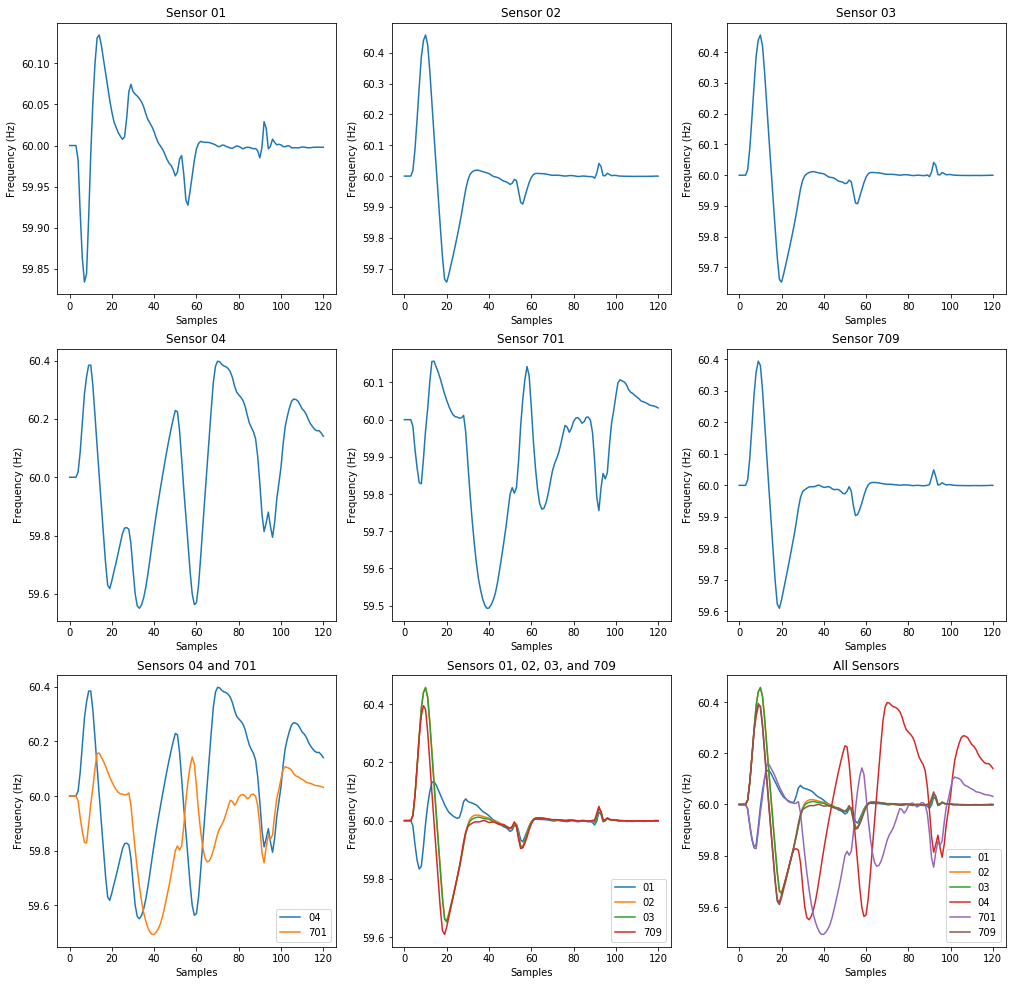

In [104]:
#plotting frequency values for all sensors to see frequency response just after an attack

mpl.figure(figsize=[17,17])

mpl.subplot(331)
mpl.plot(converted_value)
mpl.ylabel('Frequency (Hz)')
mpl.xlabel('Samples')
mpl.title('Sensor 01')

mpl.subplot(332)
mpl.plot(converted_value1)
mpl.ylabel('Frequency (Hz)')
mpl.xlabel('Samples')
mpl.title('Sensor 02')

mpl.subplot(333)
mpl.plot(converted_value2)
mpl.ylabel('Frequency (Hz)')
mpl.xlabel('Samples')
mpl.title('Sensor 03')

mpl.subplot(334)
mpl.plot(converted_value3)
mpl.ylabel('Frequency (Hz)')
mpl.xlabel('Samples')
mpl.title('Sensor 04')

mpl.subplot(335)
mpl.plot(converted_value4)
mpl.ylabel('Frequency (Hz)')
mpl.xlabel('Samples')
mpl.title('Sensor 701')

mpl.subplot(336)
mpl.plot(converted_value5)
mpl.ylabel('Frequency (Hz)')
mpl.xlabel('Samples')
mpl.title('Sensor 709')

#these two were both similar in that they did not match the others and show biggest freq changes
mpl.subplot(337)
mpl.plot(converted_value3,label='04')
mpl.plot(converted_value4,label='701')
mpl.ylabel('Frequency (Hz)')
mpl.xlabel('Samples')
mpl.title('Sensors 04 and 701')
mpl.legend(loc='lower right')

#these are the other plots not shown in the above plot; you can see their similarity
mpl.subplot(338)
mpl.plot(converted_value,label='01')
mpl.plot(converted_value1,label='02')
mpl.plot(converted_value2,label='03')
mpl.plot(converted_value5,label='709')
mpl.ylabel('Frequency (Hz)')
mpl.xlabel('Samples')
mpl.title('Sensors 01, 02, 03, and 709')
mpl.legend(loc='lower right')

#all plots in one; this isn't that necessary as it doesn't show us much
mpl.subplot(339)
mpl.plot(converted_value,label='01')
mpl.plot(converted_value1,label='02')
mpl.plot(converted_value2,label='03')
mpl.plot(converted_value3,label='04')
mpl.plot(converted_value4,label='701')
mpl.plot(converted_value5,label='709')
mpl.ylabel('Frequency (Hz)')
mpl.xlabel('Samples')
mpl.title('All Sensors')
mpl.legend(loc='lower right')

Text(0.5, 1.0, 'Sensor 709')

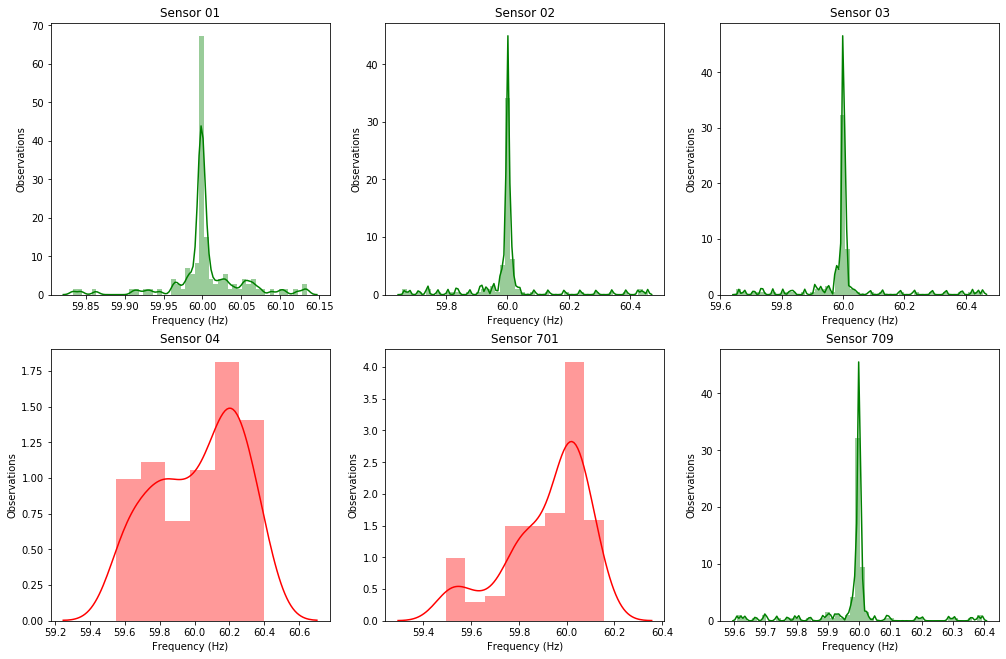

In [107]:
fig = mpl.figure(figsize=[17,17])

#distplot plots a univariate distribution of observations
#I noticed a pattern where the sensors closest to the attack location have a wider distibution of frequencies

ax = fig.add_subplot(331)
sns.distplot(converted_value,color='green',ax=ax)
mpl.xlabel('Frequency (Hz)')
mpl.ylabel('Observations')
mpl.title('Sensor 01')

ax1 = fig.add_subplot(332)
sns.distplot(converted_value1,color='green',ax=ax1)
mpl.xlabel('Frequency (Hz)')
mpl.ylabel('Observations')
mpl.title('Sensor 02')

ax2 = fig.add_subplot(333)
sns.distplot(converted_value2,color='green',ax=ax2)
mpl.xlabel('Frequency (Hz)')
mpl.ylabel('Observations')
mpl.title('Sensor 03')

ax3 = fig.add_subplot(334)
sns.distplot(converted_value3,color='red',ax=ax3)
mpl.xlabel('Frequency (Hz)')
mpl.ylabel('Observations')
mpl.title('Sensor 04')

ax4 = fig.add_subplot(335)
sns.distplot(converted_value4,color='red',ax=ax4)
mpl.xlabel('Frequency (Hz)')
mpl.ylabel('Observations')
mpl.title('Sensor 701')

ax5 = fig.add_subplot(336)
sns.distplot(converted_value5,color='green',ax=ax5)
mpl.xlabel('Frequency (Hz)')
mpl.ylabel('Observations')
mpl.title('Sensor 709')